In [ ]:
## REPRESENTING THE CELLS IN 2D ##

In [1]:
#install packages for analysis and plotting

from scipy.io import mmread
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy.sparse import csr_matrix
matplotlib.rcParams.update({'font.size': 22})

In [2]:
#read in the count matrix that was output by `kb`.

mtx = mmread("C:\\Users\\HP\\Downloads\\Kallisto_indiv\\SAMN23098196\\counts_unfiltered\\cells_x_genes.mtx")

In [3]:
#perform Singular Value Decomposition

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(mtx)
X = tsvd.transform(mtx)

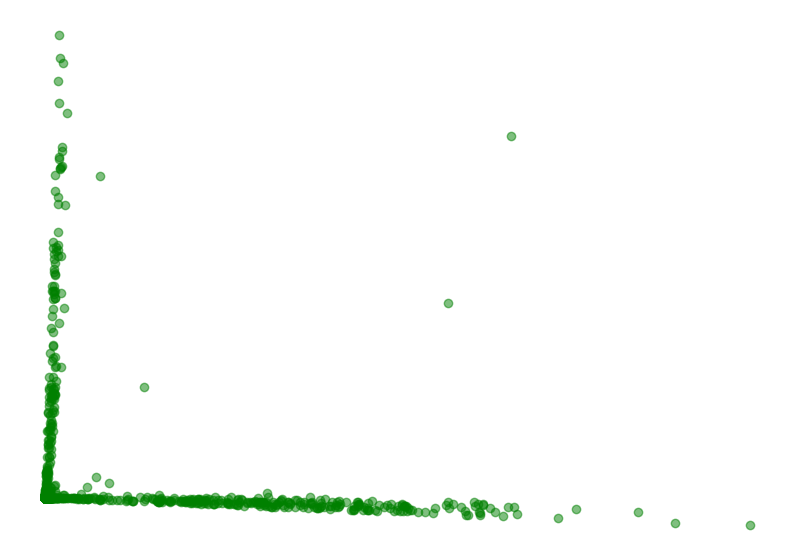

In [4]:
#plot the cells in the 2D PCA projection

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(X[:,0], X[:,1], alpha=0.5, c="green")

plt.axis('off')
plt.show()

#while the PCA plot shows the overall structure of the data, a visualization highlighting the density of points reveals a large number of droplets represented in the lo

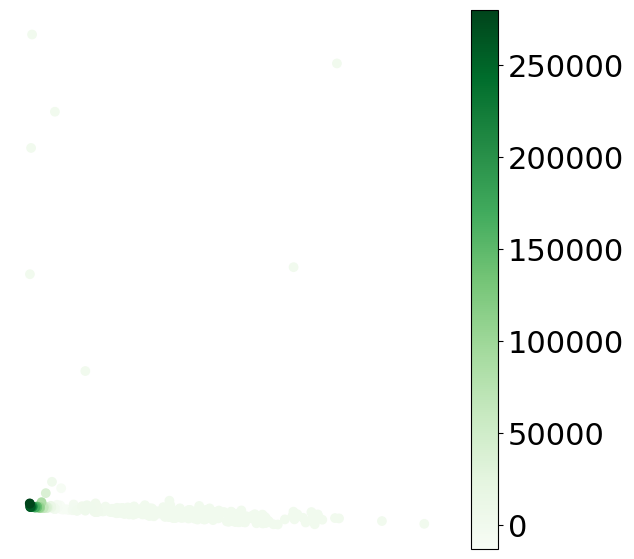

In [5]:
#density display for PCA plot
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    sc = ax.scatter( x, y, c=z, **kwargs )
    return sc

fig, ax = plt.subplots(figsize=(7,7))

x = X[:,0]
y = X[:,1]

sc = density_scatter(x, y, ax=ax, cmap="Greens")

fig.colorbar(sc, ax=ax)
plt.axis('off')

plt.show()

#the following plot helps clarify the reason for the concentrated points in the lower-left corner of the PCA plot.

In [6]:
#create sparse matrix representation of the count matrix

mtx = csr_matrix(mtx)

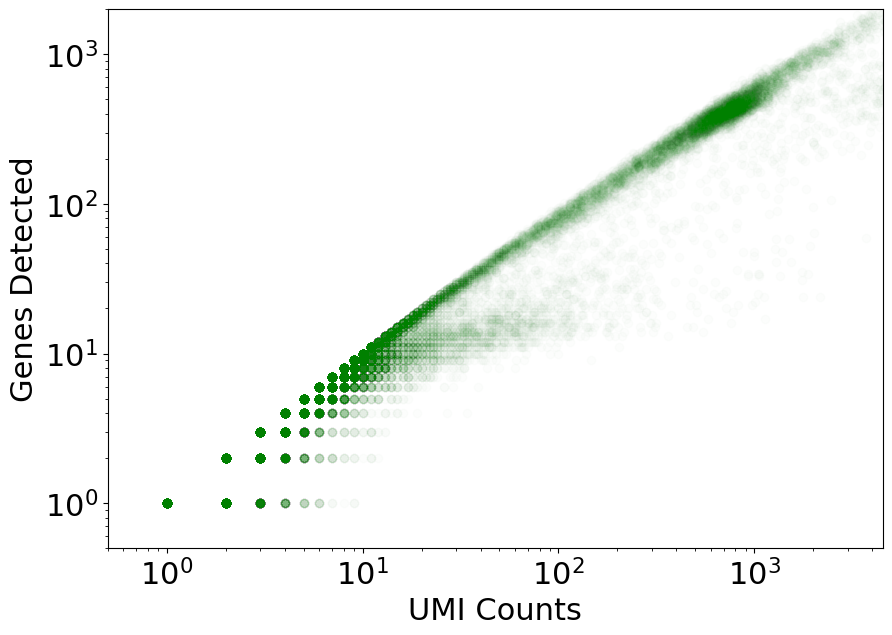

In [7]:
#create a plot showing genes detected as a function of UMI counts.

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(np.asarray(mtx.sum(axis=1))[:,0], np.asarray(np.sum(mtx>0, axis=1))[:,0], color="green", alpha=0.01)
ax.set_xlabel("UMI Counts")
ax.set_ylabel("Genes Detected")
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim((0.5, 4500))
ax.set_ylim((0.5,2000))


plt.show()

In [ ]:
#here we see that there are a large number of near empty droplets. A useful approach to filtering out such data is the "knee plot" shown below.

In [ ]:
## EXAMINE THE KNEE PLOT ##

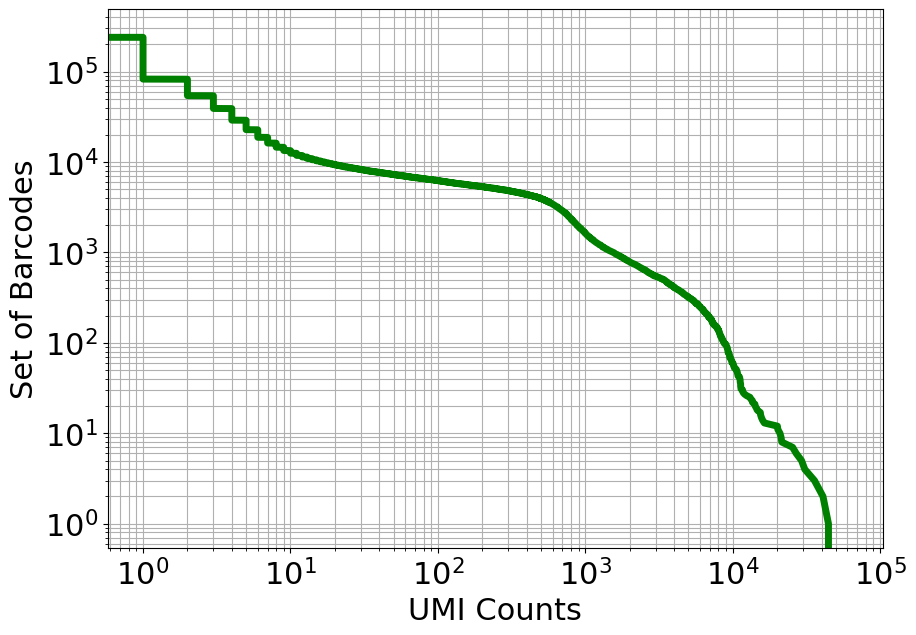

In [8]:
# Create the "knee plot"
knee = np.sort((np.array(mtx.sum(axis=1))).flatten())[::-1]
fig, ax = plt.subplots(figsize=(10, 7))

ax.loglog(knee, range(len(knee)),linewidth=5, color="g")

ax.set_xlabel("UMI Counts")
ax.set_ylabel("Set of Barcodes")

plt.grid(True, which="both")
plt.show()

#in this plot cells are ordered by the number of UMI counts associated to them (shown on the x-axis), and the fraction of droplets with at least that number of cells is shown on the y-axis:

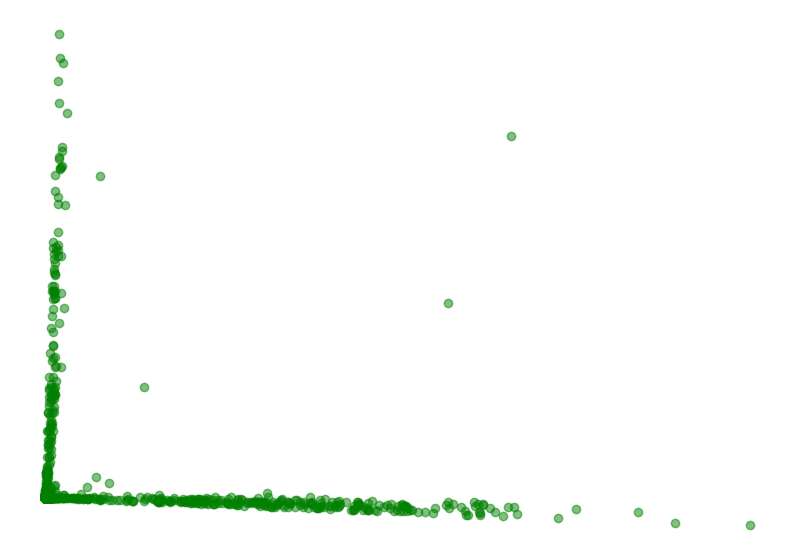

In [9]:
#@title Exploring PCA subspsaces { run: "auto", vertical-output: true, display-mode: "both" }
n_components =  2#@param {type:"integer"}
dimension_A =  1#@param {type:"integer"}
dimension_B =  2#@param {type:"integer"}
# Perform SVD
tsvd = TruncatedSVD(n_components)
tsvd.fit(mtx)
X = tsvd.transform(mtx)

# Plot the cells in the 2D PCA projection
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(X[:,dimension_A-1], X[:,dimension_B-1], alpha=0.5, c="green")

plt.axis('off')
plt.show()